In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
import itertools as it
import urllib, io
import log
import math
import plotting

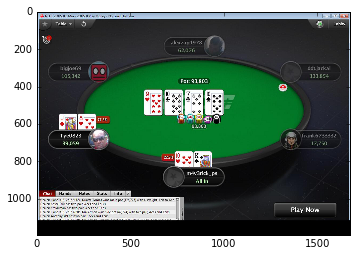

In [98]:
table = Image.open('res/tables/003.jpeg').resize((1674, 1193), resample=Image.BICUBIC)

plt.imshow(table)

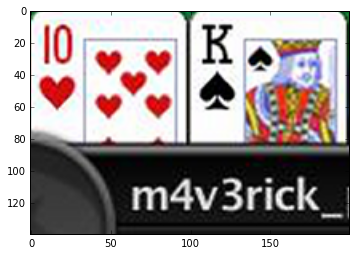

In [99]:
def crop(canvas, offset, size):
    (offset_x, offset_y) = offset
    (width, height) = size
    return canvas.crop((offset_x, offset_y, offset_x + width, offset_y + height))


offsets_sizes = {
    'SUIT': ((0, 34), ((34, 36))),
    'RANK': ((7, 9), (20, 26)),
    'CARD': ((100, 0), (100, 140)),
    'BOARD': ((572, 420), (550, 140)),
    'HAND_2': ((1356, 187), (200, 140)),
    'HAND_4': ((1356, 545), (200, 140)),
    'HAND_6': ((735, 749), (200, 140)),
    'HAND_8': ((116, 545), (200, 140)),
    'HAND_10': ((116, 187), (200, 140)),
    'HAND_12': ((734, 61), (200, 140))
}


def suit(canvas):
    offset, size = offsets_sizes['SUIT']
    return crop(canvas, offset, size)


def rank(canvas):
    offset, size = offsets_sizes['RANK']
    return crop(canvas, offset, size)


def card(canvas, idx, padding):
    (left, top), size = offsets_sizes['CARD']
    width, _ = size
    offset = ((left + padding) * idx, top)
    return crop(canvas, offset, size)


def prescale_crop(table, name):
    table = table.resize((1675, 1193), resample=Image.BICUBIC)
    offset, size = offsets_sizes[name]
    return crop(table, offset, size)


def board(table):
    return prescale_crop(table, 'BOARD')


def hand(table, name):
    return prescale_crop(table, name)


def hand_2(table):
    return hand(table, 'HAND_2')

def hand_4(table):
    return hand(table, 'HAND_4')

def hand_6(table):
    return hand(table, 'HAND_6')

def hand_8(table):
    return hand(table, 'HAND_8')

def hand_10(table):
    return hand(table, 'HAND_10')

def hand_12(table):
    return hand(table, 'HAND_12')


def board_cards(table):
    board_canvas = board(table)
    cards = [card(board_canvas, idx, padding = 9) for idx in range(0, 5)]
    ranks_suits = [(rank(c), suit(c)) for c in cards]
    return zip(*ranks_suits)


def hand_cards(table):
    hand_canvas = hand(table)
    cards = [card(hand_canvas, idx, padding = 0) for idx in range(0, 2)]
    ranks_suits = [(rank(c), suit(c)) for c in cards]
    return zip(*ranks_suits)


plt.imshow(hand_6(table))